In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid", palette='deep', color_codes=True)

In [179]:
nRowsRead = None 
dataset = pd.read_csv('AB_NYC_2019.csv', delimiter=',', nrows = nRowsRead) # reads all rows
dataset.dataframeName = 'AB_NYC_2019.csv'
nRow, nCol = dataset.shape
print(f'Dataset contains {nRow} rows and {nCol} columns')

Dataset contains 48895 rows and 16 columns


In [180]:
dataset #displays dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [181]:
#drops columns that will not be used in calculations
dataset.drop(['id', 'name', 'host_id', 'host_name', 'latitude','longitude', 'last_review' ], axis=1, inplace=True)

In [182]:
dataset #displays altered dataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [183]:
dataset.isnull().sum() #checks for for columns with null values
dataset.fillna({'reviews_per_month':0}, inplace=True) #fills column with default values

In [184]:
dataset["price"].describe() #dispalys price info

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

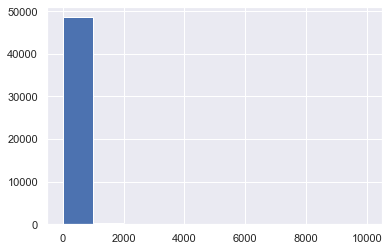

In [185]:
### See the distribution of price
hist_price=dataset["price"].hist()

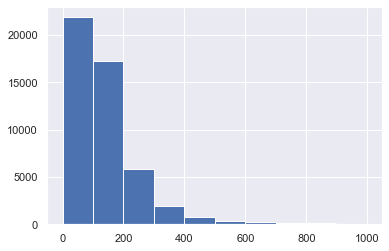

In [186]:
hist_price1=dataset["price"][dataset["price"]<1000].hist() #histogram for prices less than 1000

In [187]:
dataset[dataset["price"]>1000] #listings with price more than 1000

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,Manhattan,Upper West Side,Entire home/apt,2000,30,30,0.33,11,0
762,Manhattan,West Village,Entire home/apt,1300,5,28,0.31,4,297
946,Manhattan,Upper West Side,Private room,3000,7,0,0.00,1,365
1105,Manhattan,Lower East Side,Private room,1300,1,0,0.00,1,0
1480,Manhattan,Upper West Side,Entire home/apt,2000,30,59,0.71,11,364
...,...,...,...,...,...,...,...,...,...
48080,Manhattan,SoHo,Entire home/apt,1308,2,0,0.00,1,179
48304,Manhattan,Hell's Kitchen,Entire home/apt,2999,30,0,0.00,1,222
48305,Manhattan,Upper East Side,Entire home/apt,1999,30,0,0.00,1,270
48523,Brooklyn,Bedford-Stuyvesant,Entire home/apt,1369,1,0,0.00,1,349


In [188]:
# altering price range
dataset=dataset[dataset["price"]<1000] 
dataset=dataset[dataset["price"]!=0] 

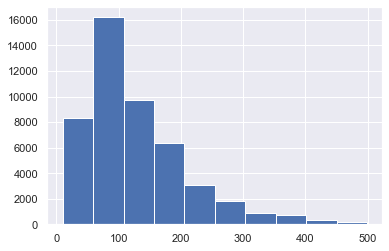

In [189]:
hist_price2=dataset["price"][dataset["price"]<500].hist()

In [190]:
dataset["price"].describe() #price info after alterations

count    48586.000000
mean       140.269049
std        112.899316
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64

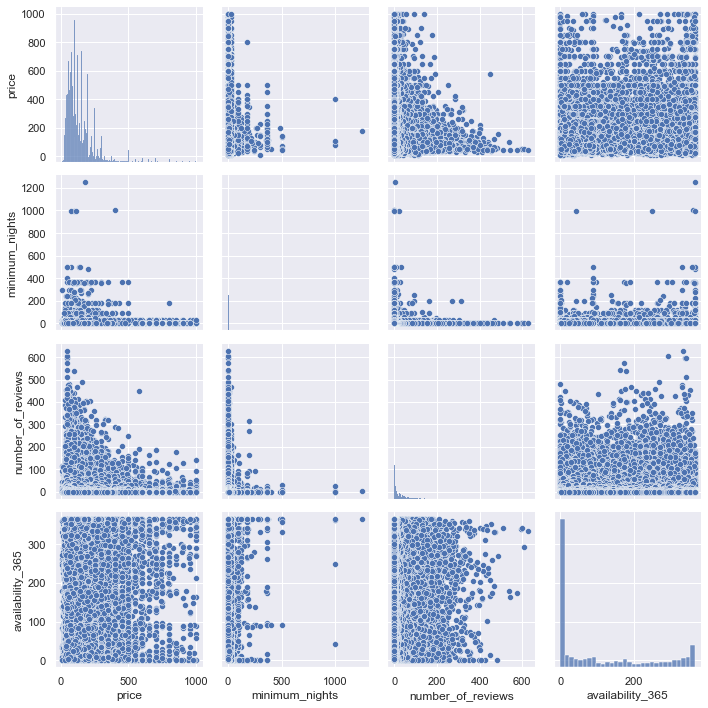

In [191]:
columns = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
sns.pairplot(dataset[columns]);
plt.tight_layout();
plt.show()
#linear dependancy between characteristics

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


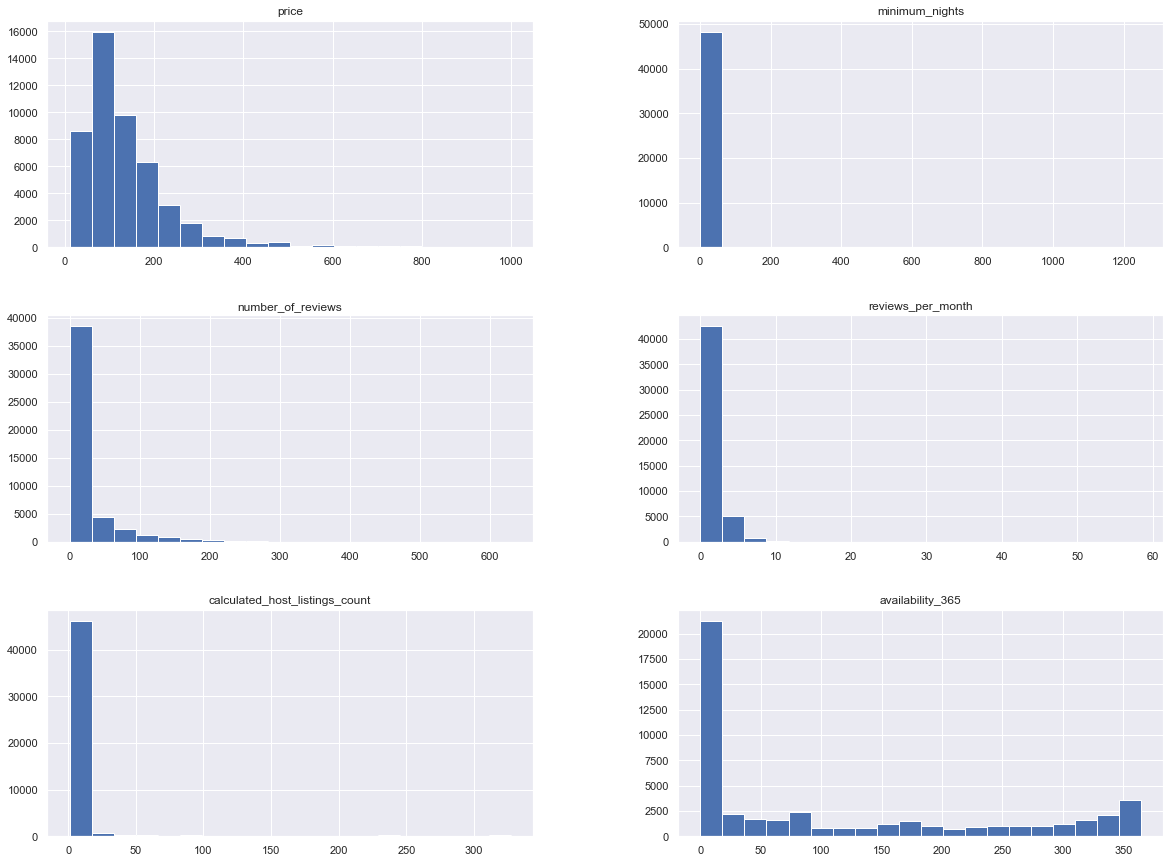

In [192]:
dataset.hist(bins = 20,figsize = (20,15))
plt.show()

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

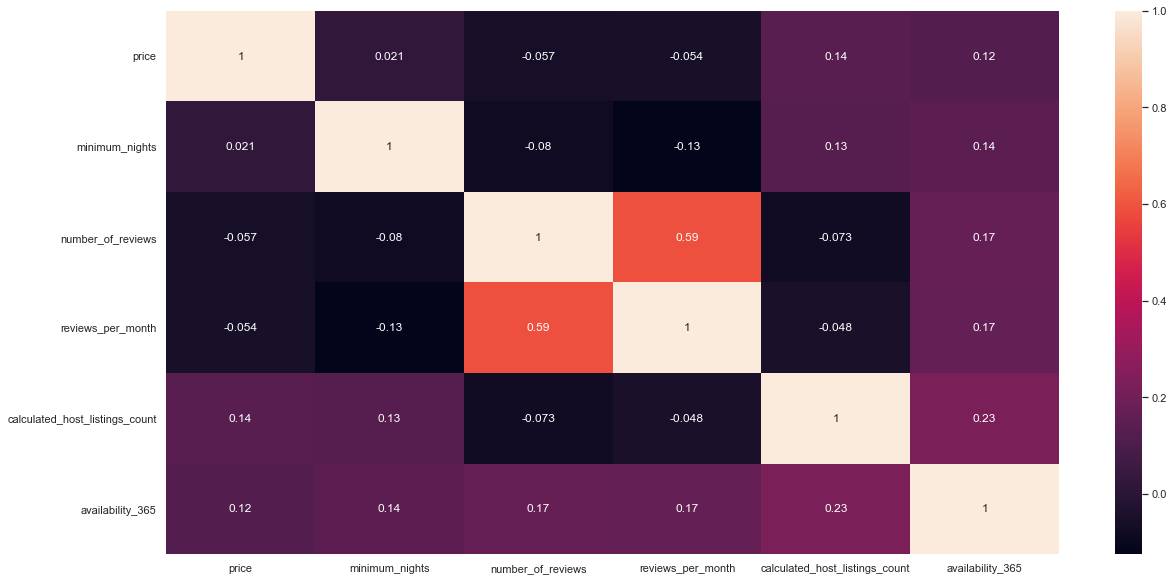

In [193]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
dataset.columns
#correlation matrixes

In [194]:
dataset.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [195]:
dataset_onehot1 = pd.get_dummies(dataset, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
dataset_onehot1.drop(["neighbourhood"], axis=1, inplace=True)

In [196]:
X1= dataset_onehot1.loc[:, dataset_onehot1.columns != 'price']
Y1 = dataset_onehot1["price"]

In [197]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)

In [198]:
### Fitting Linear regression
reg1 = LinearRegression().fit(x_train1, y_train1)

In [199]:
reg1.score(x_train1, y_train1)
y_pred1 = reg1.predict(x_test1)


print("Mean absolute error: ",metrics.mean_absolute_error(y_test1.values,y_pred1))
print("Mean squared error: ",metrics.mean_squared_error(y_test1.values,y_pred1))
print("Root mean squared error: ",metrics.mean_squared_error(y_test1.values,y_pred1,squared=False))


Mean absolute error:  56.57310531393355
Mean squared error:  8928.33574272091
Root mean squared error:  94.4898711117806


In [200]:
dataset.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1, inplace=True)
x = dataset.drop('price',axis=1)
y = dataset['price']

#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [201]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polinomial_degree = 2;
polynomial_features = PolynomialFeatures(degree=polinomial_degree,include_bias=False)
linear_regression = LinearRegression(normalize=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression(normalize=True))])

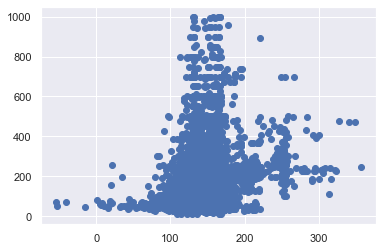

In [202]:
predictions = pipeline.predict(x_test)
plt.scatter(predictions, y_test)

In [203]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 75.09747653823585
MSE: 12548.402265151419
RMSE: 112.0196512454463


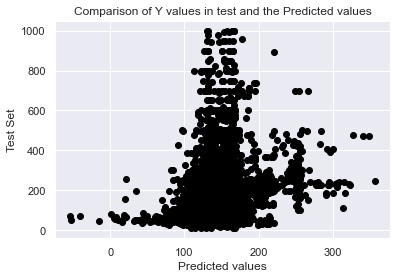

In [204]:
y_predicted = pipeline.predict(x_test)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test,  color='black')
plt.show()

In [205]:
delta = abs(y_test.values - y_predicted)
maxVal = -101
index =0
for i in range(y_test.shape[0]):
    if(delta[i] > maxVal):
        maxVal= delta[i];
        index = i;

print("max val index: ",index)
print("max val: ",maxVal)

max val index:  11380
max val:  868.9318136563484


In [206]:
x_test.iloc[index]

minimum_nights                    7.00
number_of_reviews                 1.00
reviews_per_month                 0.02
calculated_host_listings_count    1.00
availability_365                  0.00
Name: 9092, dtype: float64

In [207]:
print("predicted one: ",y_predicted[index],
      " from dataset: ",y_test.iloc[index])

predicted one:  130.06818634365158  from dataset:  999


In [208]:
from sklearn.ensemble import ExtraTreesClassifier
X = dataset.drop(["price"],axis=1)
Y = dataset["price"]

In [209]:
def normalize(X):

    mean =np.mean(X) 
    std = np.std(X)
    X_new = (X-mean)/std
    return X_new, mean, std

In [210]:

def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [211]:
def cost_function(X, y, theta):

    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X,theta) - y)**2)/(2*m);
    return J

In [212]:

def hypothesis(X, theta):
    h_thetha = X.dot(theta);
    return h_thetha

In [213]:

def derivative(X, y, theta):
    m = X.shape[0]

    d_thetha = np.dot(hypothesis(X, theta) - y, X) / m
    return d_thetha

In [214]:

def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):

    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [216]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0,0,0,0,0])

In [217]:

y = y_train[:]
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (29151, 6)
y: (29151,)
16209.953329216836


In [218]:
alpha = 0.01
num_iters = 1500
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 140.30139068532372; Theta 1: -2.1959718847337157


In [219]:
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)

In [220]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 75.01099477390527
MSE: 12356.168597569464
RMSE: 111.1583042222643
